In [0]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import time
import matplotlib.pyplot as plt
import numpy as np

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Loss at step 000: 2.305
0.001
Loss at step 500: 2.059
0.001
Loss at step 1000: 1.840
0.001
Loss at step 1500: 1.649
0.001
Loss at step 2000: 1.488
0.001
Loss at step 2500: 1.356
0.001
Loss at step 3000: 1.250
0.001
Loss at step 3500: 1.169
0.001
Loss at step 4000: 1.108
0.001
Loss at step 4500: 1.063
0.001
W : [2.632496] , b = [1.4063181] 
Loss at step 000: 2.497
0.01
Loss at step 500: 1.079
0.01
Loss at step 1000: 0.957
0.01
Loss at step 1500: 0.955
0.01
Loss at step 2000: 0.955
0.005
Loss at step 2500: 0.955
0.0025
Loss at step 3000: 0.955
0.00125
Loss at step 3500: 0.955
0.000625
Loss at step 4000: 0.955
0.0003125
Loss at step 4500: 0.955
0.00015625
W : [3.0559857] , b = [1.8678414] 
Loss at step 000: 2.943
0.1
Loss at step 500: 0.955
0.1
Loss at step 1000: 0.955
0.05
Loss at step 1500: 0.955
0.025
Loss at step 2000: 0.955
0.0125
Loss at step 2500: 0.955
0.00625
Loss at step 3000: 0.955
0.0

<function matplotlib.pyplot.show>

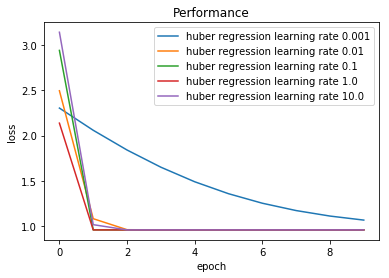

In [0]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tfe.enable_eager_execution()
# Create data
NUM_EXAMPLES = 500

#define inputs and outputs with some noise 
X = tf.random_normal([NUM_EXAMPLES])  #inputs 
noise = tf.random_normal([NUM_EXAMPLES],mean=0.0,stddev=2.0) #noise 
y = X * 3 + 2 + noise  #true output

# Create variables.
W = None
b = None


train_steps = 5000
# Define the linear predictor.
def prediction(x):
  yhat = X * W + b
  return yhat

# Define loss functions of the form: L(y, y_predicted)
def squared_loss(y, y_predicted):
  error = y_predicted - y
  loss = tf.reduce_mean(tf.square(error))
  return loss
# def huber_loss(y, y_predicted, m=1.0):
#   error = y_predicted - y
#   """Huber loss."""
#   loss= tf.reduce_mean(tf.convert_to_tensor([((1/2)*(tf.square(err))) if (tf.math.abs(err)) <=(m) else (m*(tf.math.abs(err))-(1/2)*m*m) for err in error]))
#   return loss
def huber_loss(y,y_predicted, m=1.0):
    error = tf.math.abs(y_predicted - y)
    flag = (error > m)
    loss=(tf.reduce_sum(0.5 * tf.square(tf.boolean_mask( ((error)),(~flag)))) -tf.reduce_sum( m * (0.5 * m -(tf.boolean_mask(error,(flag)  )))))/len(error)
    return loss
def Pseudo_huber_loss(y, y_predicted, m=1.0): #this is the hybrid-strongly_convex L1L2 norm form of huber loss
  error =tf.math.abs(y_predicted - y)
  loss = tf.reduce_mean(m*m*(tf.sqrt(1+(error/m)**2)-1))
  return loss
# for i in range(train_steps):
#   ##TO DO ## Calculate gradients
#   with tf.GradientTape() as tape:
#     dW, db = tape.gradient(squared_loss(y,prediction(X)), [W, b])
#     W.assign_sub(dW * learning_rate)
#     b.assign_sub(db* learning_rate)
#     if i % 500 == 0:
#         print("Loss at step {:03d}: {:.3f}".format(i, squared_loss(y,prediction(X))))
# print(f'W : {W.numpy()} , b = {b.numpy()} ')
# for i in range(train_steps):
#   ###TO DO ## Calculate gradients
#   with tf.GradientTape() as tape:
#     dW, db = tape.gradient(huber_loss(y,prediction(X)), [W, b])
#     W.assign_sub(dW * learning_rate)
#     b.assign_sub(db* learning_rate)
#     if i % 500 == 0:
#       print("Loss at step {:03d}: {:.3f}".format(i, huber_loss(y,prediction(X))))
# print(f'W : {W.numpy()} , b = {b.numpy()} ')

# for i in range(train_steps):
#   ###TO DO ## Calculate gradients
#   with tf.GradientTape() as tape:
#     dW, db = tape.gradient(tf.losses.huber_loss(y,prediction(X)), [W, b])
#     W.assign_sub(dW * learning_rate)
#     b.assign_sub(db* learning_rate)
#     if i % 500 == 0:
#       print("Loss at step {:03d}: {:.3f}".format(i, tf.losses.huber_loss(y,prediction(X))))
# print(f'W : {W.numpy()} , b = {b.numpy()} ')
# print(tf.losses.huber_loss(y,prediction(X)))
for learning_rate in np.logspace(-3,1,num=5,base=10):
  LR=learning_rate
  accuracy=list()
  W = tf.Variable(tf.random_normal([1]), name = "W")
  b = tf.Variable(tf.random_normal([1]), name = "b")
  for i in range(train_steps):
    temp=Pseudo_huber_loss(y,prediction(X))   
    ###TO DO ## Calculate gradients
    with tf.GradientTape() as tape:
      dW, db = tape.gradient(Pseudo_huber_loss(y,prediction(X)), [W, b])
      W.assign_sub(dW * learning_rate)
      b.assign_sub(db* learning_rate)
      if i % 500 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, Pseudo_huber_loss(y,prediction(X))))
        accuracy.append(Pseudo_huber_loss(y,prediction(X)))
        print(learning_rate)
        if temp  -  Pseudo_huber_loss(y,prediction(X)) < 0.00001:
          learning_rate=learning_rate/2
  print(f'W : {W.numpy()} , b = {b.numpy()} ')
  plt.plot(range(len(accuracy)), accuracy,
   label=f"huber regression learning rate {LR}")
plt.title('Performance')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show
#   plt.plot(test_sam_perf[i].keys(), test_sam_perf[i].values())
#   if i==10:
#     plt.text(list(test_sam_perf[i].keys())[2],list(test_sam_perf[i].values())[2],'This is from line {}'.format(i))
#   else:
#     if list(test_sam_perf[i-1].values())!=list(test_sam_perf[i].values()):    
#        plt.text(list(test_sam_perf[i].keys())[2],list(test_sam_perf[i].values())[2],'This is from line {} '.format(i))
        
